In [ ]:
 # visualizations
import matplotlib.pyplot as plt
import seaborn as sn

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

# machine learning processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc, plot_confusion_matrix

#basic imports
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_columns', None)

In [2]:
#Read in data
df = pd.read_csv("../Resources/dog.csv")
df.head()

C:\Users\slapp\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Animal Id,Animal Type,Animal Breed,Animal Origin,Census Tract,Council District,Chip Status,Intake Date,Outcome Date,Intake Condition,Outcome Condition,Reason,Outcome Type,Additional Information,Length of Stay
0,1,A0008962,DOG,RETRIEVER,FIELD,75218,18,NO CHIP,2015-09-24,2015-10-04,REHABILITABLE NON-CONTAGIOUS,TREATABLE MANAGEABLE NON-CONTAGIOUS,NaN,EUTHANIZED,NaN,10 days 00:00:00.000000000
1,2,A0121376,DOG,SHEPHERD,FIELD,39A,9A,CHIP,2015-05-01,2015-05-03,MANAGEABLE NON-CONTAGIOUS,TREATABLE MANAGEABLE NON-CONTAGIOUS,NaN,EUTHANIZED,NaN,2 days 00:00:00.000000000
2,5,A0179837,DOG,OTHER,OVER THE COUNTER,W,W,NO CHIP,2015-04-27,2015-04-27,MANAGEABLE NON-CONTAGIOUS,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,OWNER PROBLEM,EUTHANIZED,NaN,0 days 00:00:00.000000000
3,6,A0183589,DOG,OTHER,FIELD,55W,5W,CHIP,2015-06-01,2015-06-01,UNTREATABLE NON-CONTAGIOUS,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,NaN,EUTHANIZED,NaN,0 days 00:00:00.000000000
4,8,A0187667,DOG,RETRIEVER,OVER THE COUNTER,75212,12,NO CHIP,2015-08-15,2015-08-15,UNTREATABLE NON-CONTAGIOUS,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,EUTHANASIA OLD,EUTHANIZED,NaN,0 days 00:00:00.000000000


In [3]:
#Select columns needed for modeling
df = df[['Animal Id', 'Animal Breed','Animal Origin', 'Chip Status',
       'Intake Date', 'Outcome Date', 'Intake Condition', 'Outcome Type', 'Length of Stay']]

In [ ]:
df.head()

In [ ]:
df.info()

In [4]:
#Change length of stay into INT
LoS = []
for x in range(0, len(df)):
    temp = df['Length of Stay'][x]
    temp.split(' ')
    LoS.append(temp[0])

In [5]:
df["Length of Stay"] = LoS
df.head()

,Animal Id,Animal Breed,Animal Origin,Chip Status,Intake Date,Outcome Date,Intake Condition,Outcome Type,Length of Stay
0,A0008962,RETRIEVER,FIELD,NO CHIP,2015-09-24,2015-10-04,REHABILITABLE NON-CONTAGIOUS,EUTHANIZED,1
1,A0121376,SHEPHERD,FIELD,CHIP,2015-05-01,2015-05-03,MANAGEABLE NON-CONTAGIOUS,EUTHANIZED,2
2,A0179837,OTHER,OVER THE COUNTER,NO CHIP,2015-04-27,2015-04-27,MANAGEABLE NON-CONTAGIOUS,EUTHANIZED,0
3,A0183589,OTHER,FIELD,CHIP,2015-06-01,2015-06-01,UNTREATABLE NON-CONTAGIOUS,EUTHANIZED,0
4,A0187667,RETRIEVER,OVER THE COUNTER,NO CHIP,2015-08-15,2015-08-15,UNTREATABLE NON-CONTAGIOUS,EUTHANIZED,0


In [6]:
df = df.rename(columns={'Length of Stay': 'Length of Stay(days)'})

In [7]:
df['Length of Stay(days)'] = df['Length of Stay(days)'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136303 entries, 0 to 136302
Data columns (total 9 columns):
Animal Id               136303 non-null object
Animal Breed            136303 non-null object
Animal Origin           136303 non-null object
Chip Status             136303 non-null object
Intake Date             136303 non-null object
Outcome Date            136303 non-null object
Intake Condition        136303 non-null object
Outcome Type            136303 non-null object
Length of Stay(days)    136303 non-null int32
dtypes: int32(1), object(8)
memory usage: 8.8+ MB


In [9]:
#One Hot Encode categorical data
num_features = df[["Length of Stay(days)"]]
cat_features = df[["Animal Breed", "Animal Origin", "Chip Status", "Intake Condition"]]

dums = pd.get_dummies(cat_features)
dums_notone = pd.get_dummies(cat_features, drop_first=True)

#Lable encoder for target
enc = LabelEncoder()
target = enc.fit_transform(df['Outcome Type'])
target = pd.DataFrame(target)
target.columns = ['Outcome Type']
#target = pd.get_dummies(df[["Outcome Type"]])
#target_notone = pd.get_dummies(df[["Outcome Type"]], drop_first=True)

In [10]:
target['Outcome Type'].value_counts()

0    49663
2    31681
1    29464
3    25495
Name: Outcome Type, dtype: int64

In [11]:
df['Outcome Type'].value_counts()

ADOPTION             49663
RETURNED TO OWNER    31681
EUTHANIZED           29464
TRANSFER             25495
Name: Outcome Type, dtype: int64

In [12]:
test= pd.concat([num_features, dums_notone, target], axis=1)
test.corr()

,Length of Stay(days),Animal Breed_CORGI,Animal Breed_HOUND,Animal Breed_OTHER,Animal Breed_PIT BULL,Animal Breed_PUG,Animal Breed_RETRIEVER,Animal Breed_SHEPHERD,Animal Breed_TERRIER,Animal Origin_OVER THE COUNTER,Chip Status_NO CHIP,Chip Status_UNABLE TO SCAN,Intake Condition_HEALTHY,Intake Condition_MANAGEABLE NON-CONTAGIOUS,Intake Condition_REHABILITABLE NON-CONTAGIOUS,Intake Condition_UNTREATABLE NON-CONTAGIOUS,Outcome Type
Length of Stay(days),1.000000,0.003796,0.021431,0.004844,-0.002950,-0.005955,0.013531,0.000513,0.012800,0.055119,0.152933,-0.130012,-0.010217,0.036900,0.045311,-0.104901,-0.188421
Animal Breed_CORGI,0.003796,1.000000,-0.011504,-0.031917,-0.035311,-0.003359,-0.024138,-0.024426,-0.018027,0.001928,-0.000849,-0.000322,-0.000768,-0.000389,0.001926,-0.000422,0.005699
Animal Breed_HOUND,0.021431,-0.011504,1.000000,-0.097952,-0.108369,-0.010308,-0.074080,-0.074964,-0.055324,0.037554,0.001845,-0.016292,0.000315,-0.002740,0.014183,-0.021908,0.005824
Animal Breed_OTHER,0.004844,-0.031917,-0.097952,1.000000,-0.300670,-0.028600,-0.205535,-0.207989,-0.153495,0.013115,-0.039118,0.000653,0.020012,-0.010572,-0.009052,0.004881,0.040358
Animal Breed_PIT BULL,-0.002950,-0.035311,-0.108369,-0.300670,1.000000,-0.031641,-0.227393,-0.230108,-0.169819,-0.087292,0.003504,-0.007860,-0.004893,0.039292,-0.055717,0.054726,-0.064647
Animal Breed_PUG,-0.005955,-0.003359,-0.010308,-0.028600,-0.031641,1.000000,-0.021630,-0.021888,-0.016153,0.008765,-0.001130,-0.001383,-0.000473,-0.000332,0.003838,-0.004537,0.014068
Animal Breed_RETRIEVER,0.013531,-0.024138,-0.074080,-0.205535,-0.227393,-0.021630,1.000000,-0.157299,-0.116086,0.057809,0.005831,-0.032541,-0.002325,-0.019241,0.024837,-0.023422,-0.041699
Animal Breed_SHEPHERD,0.000513,-0.024426,-0.074964,-0.207989,-0.230108,-0.021888,-0.157299,1.000000,-0.117472,-0.019878,-0.007078,-0.002721,0.001741,0.000003,-0.003998,0.005409,-0.006270
Animal Breed_TERRIER,0.012800,-0.018027,-0.055324,-0.153495,-0.169819,-0.016153,-0.116086,-0.117472,1.000000,0.029829,0.011927,0.006214,0.003796,-0.009521,0.018003,-0.024298,0.049221
Animal Origin_OVER THE COUNTER,0.055119,0.001928,0.037554,0.013115,-0.087292,0.008765,0.057809,-0.019878,0.029829,1.000000,-0.057028,-0.135697,0.026598,-0.029064,-0.007451,0.005643,-0.158510


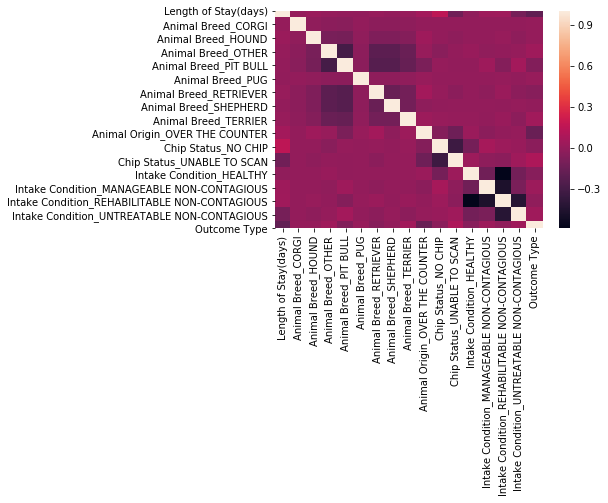

In [13]:
sn.heatmap(test.corr())

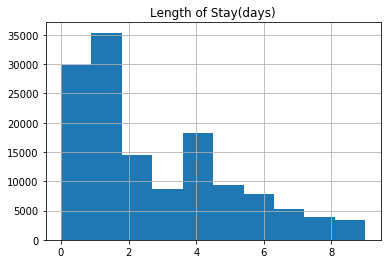

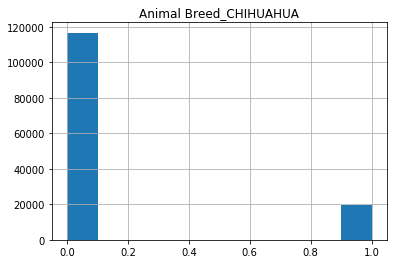

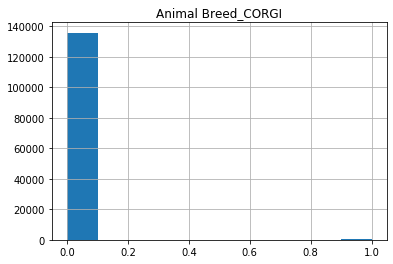

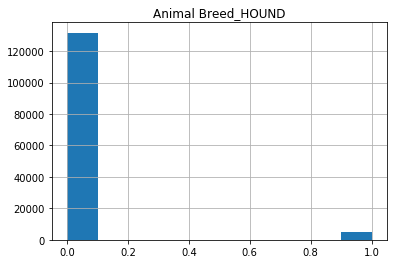

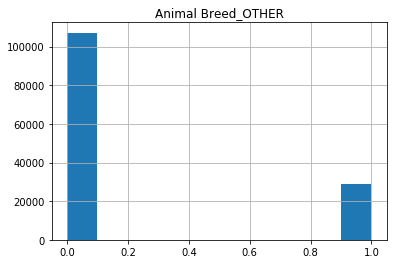

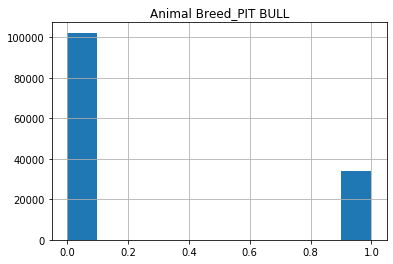

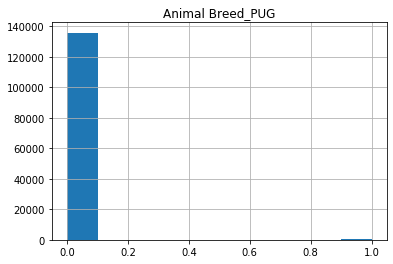

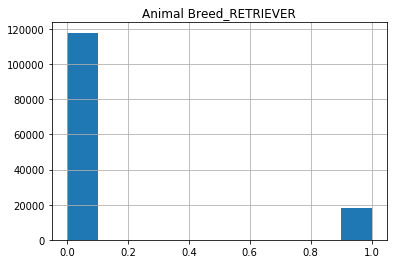

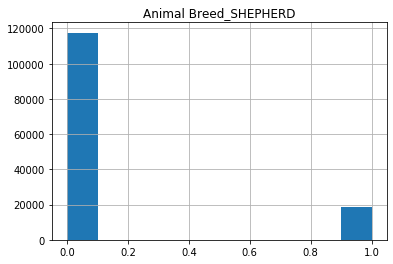

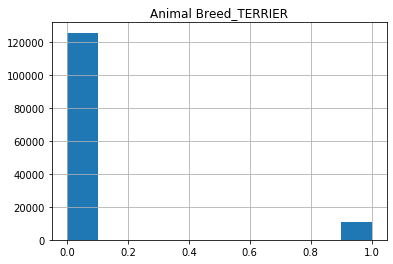

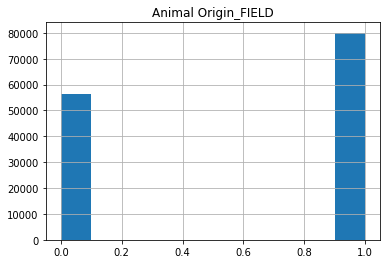

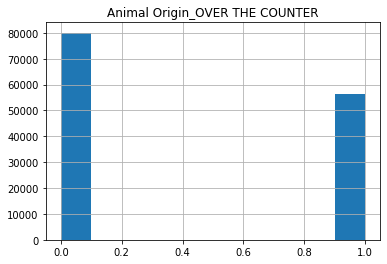

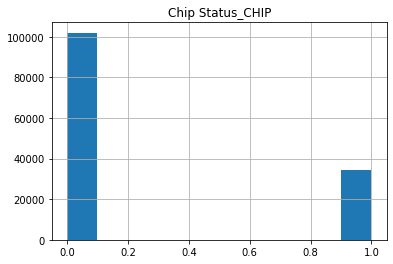

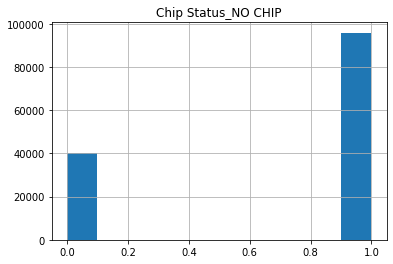

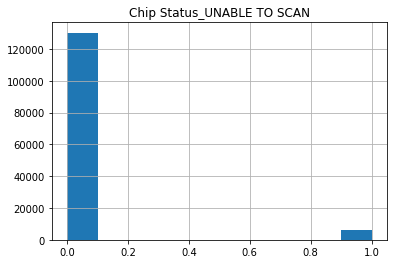

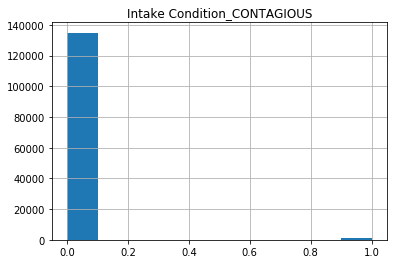

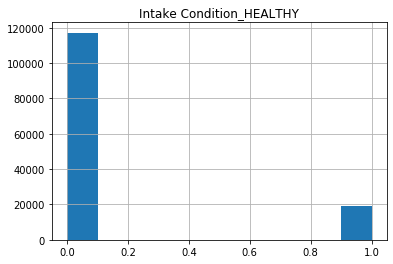

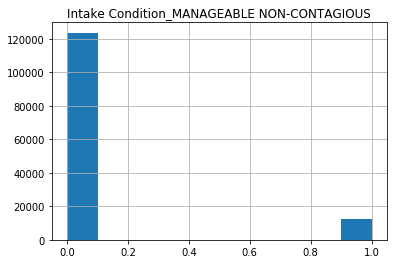

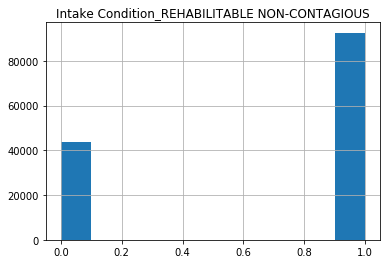

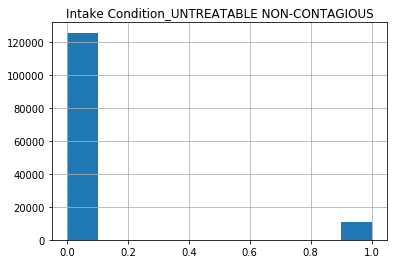

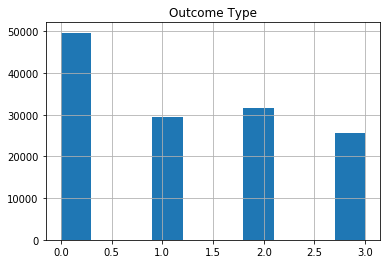

In [14]:
 #Plot histograms of data
for col in pd.concat([num_features, dums, target], axis=1).columns:
    pd.concat([num_features, dums, target], axis=1)[col].hist()
    plt.title(col)
    plt.show()

In [ ]:
#Log Reg Models

In [15]:
#Split data
data = pd.concat([num_features, dums_notone], axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target.values, random_state=19, stratify=target) #stratify for unequal target weights
y_train = y_train.ravel()
y_test = y_test.ravel()

In [16]:
#Scale Data
#SCALE 
X_scaler = StandardScaler().fit(X_train)

#scale train/test
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\slapp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\slapp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.53      0.79      0.64     12416
           1       0.52      0.46      0.49      7366
           2       0.60      0.66      0.63      7920
           3       0.46      0.04      0.07      6374

    accuracy                           0.55     34076
   macro avg       0.53      0.49      0.46     34076
weighted avg       0.53      0.55      0.50     34076


Confusion Matrix:
[[9782 1055 1470  109]
 [2875 3422  945  124]
 [1546 1129 5206   39]
 [4129  956 1053  236]]

ROC Curve:


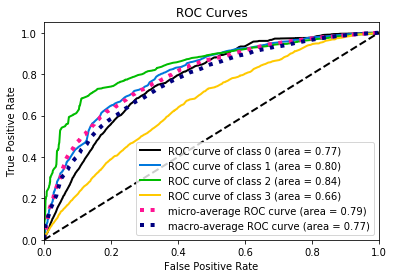

In [17]:
#logistic
lrc = LogisticRegression() #init
lrc.fit(X_train_scaled, y_train) #fit
preds = lrc.predict(X_test_scaled) #predict
proba_preds = lrc.predict_proba(X_test_scaled) #predict

print("Logistic Regression Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test.ravel(), proba_preds) 
plt.show()

k: 1, Train/Test Score: 0.499/0.488
k: 3, Train/Test Score: 0.542/0.530
k: 5, Train/Test Score: 0.545/0.536
k: 7, Train/Test Score: 0.566/0.555
k: 9, Train/Test Score: 0.568/0.558
k: 11, Train/Test Score: 0.573/0.565
k: 13, Train/Test Score: 0.575/0.565
k: 15, Train/Test Score: 0.581/0.573
k: 17, Train/Test Score: 0.580/0.574
k: 19, Train/Test Score: 0.583/0.577


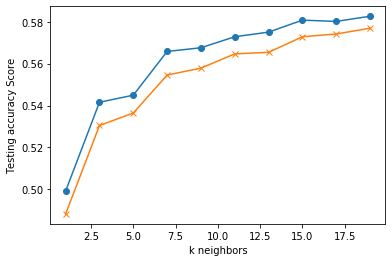

In [18]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

KNN Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.53      0.73      0.62     12416
           1       0.51      0.56      0.53      7366
           2       0.76      0.61      0.68      7920
           3       0.32      0.14      0.19      6374

    accuracy                           0.55     34076
   macro avg       0.53      0.51      0.51     34076
weighted avg       0.54      0.55      0.53     34076


Confusion Matrix:
[[9096 1764  481 1075]
 [2174 4096  572  524]
 [1959  850 4828  283]
 [3783 1264  451  876]]

ROC Curve:


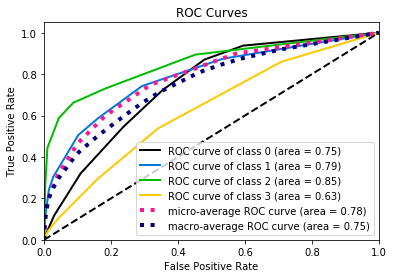

In [19]:
 #KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
preds = knn.predict(X_test_scaled) #predict
proba_preds = knn.predict_proba(X_test_scaled) #predict

print("KNN Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

In [ ]:
#SVM
#Oh dear god the memory

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_scaled, y_train)
preds = svm.predict(X_test_scaled) #predict
proba_preds = svm.predict_proba(X_test_scaled) #predict

print("SVM Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

In [ ]:
#TREES

In [20]:
#Re-Split data
data = pd.concat([num_features, dums], axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target.values, random_state=19, stratify=target) #stratify for unequal target weights
y_train = y_train.ravel()
y_test = y_test.ravel()

In [21]:
#Re-Scale Data
X_scaler = StandardScaler().fit(X_train)

#scale train/test
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Decision Tree Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.54      0.82      0.65     12416
           1       0.59      0.55      0.57      7366
           2       0.75      0.66      0.70      7920
           3       0.43      0.10      0.16      6374

    accuracy                           0.59     34076
   macro avg       0.58      0.53      0.52     34076
weighted avg       0.58      0.59      0.55     34076


Confusion Matrix:
[[10223  1227   579   387]
 [ 2395  4040   650   281]
 [ 1872   667  5218   163]
 [ 4320   966   465   623]]

ROC Curve:


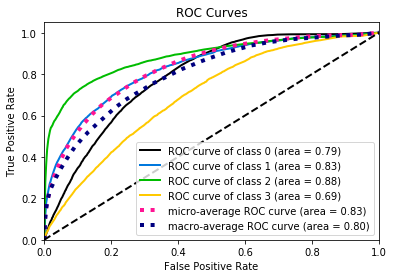

In [22]:
#Decision Tree
dtc = DecisionTreeClassifier() #init
dtc.fit(X_train_scaled, y_train) #fit
preds = dtc.predict(X_test_scaled) #predict
proba_preds = dtc.predict_proba(X_test_scaled) #predict

print("Decision Tree Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

Bagging Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.54      0.83      0.66     12416
           1       0.59      0.53      0.56      7366
           2       0.75      0.66      0.70      7920
           3       0.43      0.11      0.17      6374

    accuracy                           0.59     34076
   macro avg       0.58      0.53      0.52     34076
weighted avg       0.58      0.59      0.56     34076


Confusion Matrix:
[[10261  1138   592   425]
 [ 2450  3940   676   300]
 [ 1877   627  5250   166]
 [ 4292   927   481   674]]

ROC Curve:


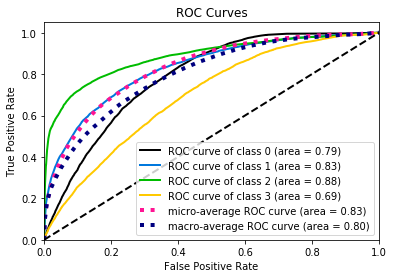

In [23]:
#Bagging Classifier
bagc = BaggingClassifier() #init
bagc.fit(X_train_scaled, y_train) #fit
preds = bagc.predict(X_test_scaled) #predict
proba_preds = bagc.predict_proba(X_test_scaled) #predict

print("Bagging Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

C:\Users\slapp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.55      0.82      0.65     12416
           1       0.58      0.55      0.57      7366
           2       0.76      0.66      0.70      7920
           3       0.42      0.11      0.17      6374

    accuracy                           0.59     34076
   macro avg       0.58      0.53      0.52     34076
weighted avg       0.58      0.59      0.56     34076


Confusion Matrix:
[[10138  1247   594   437]
 [ 2329  4081   615   341]
 [ 1843   692  5192   193]
 [ 4261   972   450   691]]

ROC Curve:


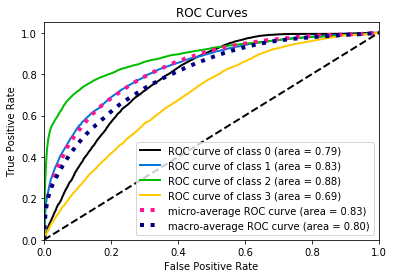

In [24]:
#Random Forest Classifier
rfc = RandomForestClassifier() #init
rfc.fit(X_train_scaled, y_train) #fit
preds = rfc.predict(X_test_scaled) #predict
proba_preds = rfc.predict_proba(X_test_scaled) #predict

print("Random Forest Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

Ada Boost Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.53      0.84      0.65     12416
           1       0.58      0.42      0.49      7366
           2       0.65      0.65      0.65      7920
           3       0.43      0.07      0.12      6374

    accuracy                           0.56     34076
   macro avg       0.55      0.49      0.48     34076
weighted avg       0.55      0.56      0.51     34076


Confusion Matrix:
[[10450   783   939   244]
 [ 2902  3102  1139   223]
 [ 1992   673  5140   115]
 [ 4518   752   673   431]]

ROC Curve:


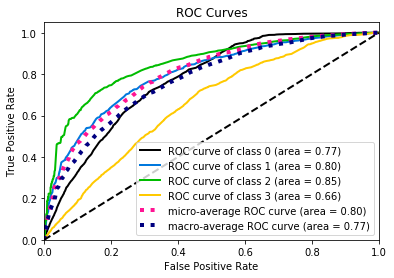

In [25]:
#Ada Boost Classifier
adac = AdaBoostClassifier() #init
adac.fit(X_train_scaled, y_train) #fit
preds = adac.predict(X_test_scaled) #predict
proba_preds = adac.predict_proba(X_test_scaled) #predict

print("Ada Boost Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

Gradient Boosting Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.54      0.85      0.66     12416
           1       0.60      0.51      0.55      7366
           2       0.76      0.66      0.71      7920
           3       0.43      0.09      0.15      6374

    accuracy                           0.59     34076
   macro avg       0.58      0.53      0.52     34076
weighted avg       0.58      0.59      0.55     34076


Confusion Matrix:
[[10570   967   566   313]
 [ 2690  3756   642   278]
 [ 1909   638  5229   144]
 [ 4496   862   459   557]]

ROC Curve:


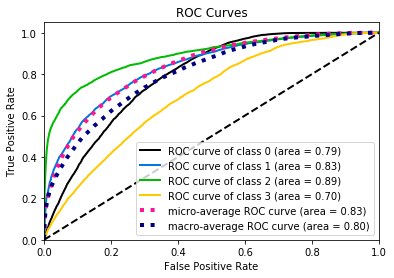

In [26]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier() #init
gbc.fit(X_train_scaled, y_train) #fit
preds = gbc.predict(X_test_scaled) #predict
proba_preds = gbc.predict_proba(X_test_scaled) #predict

print("Gradient Boosting Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

EXTREME Gradient Boosting Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.55      0.82      0.66     12416
           1       0.59      0.55      0.57      7366
           2       0.75      0.67      0.71      7920
           3       0.43      0.10      0.16      6374

    accuracy                           0.59     34076
   macro avg       0.58      0.54      0.52     34076
weighted avg       0.58      0.59      0.56     34076


Confusion Matrix:
[[10189  1224   616   387]
 [ 2328  4037   695   306]
 [ 1828   616  5309   167]
 [ 4308   946   473   647]]

ROC Curve:


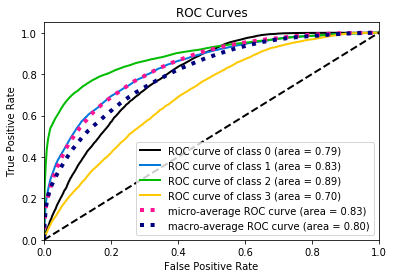

In [27]:
#EXTREME Gradient Boosting Classifier
xgbc = XGBClassifier() #init
xgbc.fit(X_train_scaled, y_train) #fit
preds = xgbc.predict(X_test_scaled) #predict
proba_preds = xgbc.predict_proba(X_test_scaled) #predict

print("EXTREME Gradient Boosting Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

In [ ]:
#Selected Grad Boost

In [28]:
#SCALE on all the data
X_scaler_prod = StandardScaler().fit(data)
X_scaled_prod = X_scaler_prod.transform(data)

Gradient Boosting Analysis PROD:
Classification Report:

              precision    recall  f1-score   support

           0       0.54      0.84      0.65     49663
           1       0.60      0.52      0.56     29464
           2       0.76      0.67      0.71     31681
           3       0.41      0.09      0.15     25495

    accuracy                           0.59    136303
   macro avg       0.58      0.53      0.52    136303
weighted avg       0.58      0.59      0.55    136303


Confusion Matrix:
[[41566  4173  2431  1493]
 [10456 15245  2554  1209]
 [ 7429  2554 21134   564]
 [17856  3476  1870  2293]]

ROC Curve:


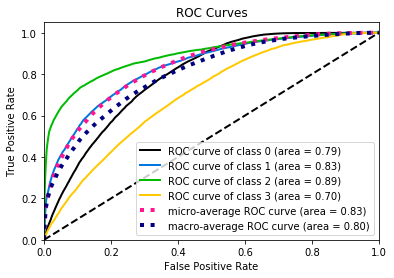

In [29]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier() #init
gbc.fit(X_scaled_prod, target.values.ravel()) #fit
preds = gbc.predict(X_scaled_prod) #predict
proba_preds = gbc.predict_proba(X_scaled_prod) #predict


print("Gradient Boosting Analysis PROD:")
print("Classification Report:")
print()
print(classification_report(target, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(target, preds)) #evaluate

#plot confusion matrix
# fig, ax = plt.subplots(figsize=(5, 5))
# plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
# plt.show()
print()
print("ROC Curve:")
plot_roc(target, proba_preds) 
plt.show()

In [30]:
#Feature Importances
sorted(list(zip(gbc.feature_importances_, data.columns)))

[(0.0001572239192678264, 'Animal Breed_CORGI'),
 (0.00031937302278867825, 'Animal Breed_PUG'),
 (0.0011055296948068048, 'Animal Breed_OTHER'),
 (0.001180716521325453, 'Animal Breed_HOUND'),
 (0.0019240254591118072, 'Chip Status_UNABLE TO SCAN'),
 (0.0033957300721325296, 'Animal Breed_SHEPHERD'),
 (0.0037369433458660306, 'Animal Breed_RETRIEVER'),
 (0.003968853247368436, 'Animal Breed_CHIHUAHUA'),
 (0.006581245987566163, 'Animal Breed_TERRIER'),
 (0.0070568868662467, 'Intake Condition_CONTAGIOUS'),
 (0.0156474164598798, 'Intake Condition_REHABILITABLE NON-CONTAGIOUS'),
 (0.017583328133176018, 'Chip Status_CHIP'),
 (0.028009053812326407, 'Intake Condition_MANAGEABLE NON-CONTAGIOUS'),
 (0.03179992491717289, 'Chip Status_NO CHIP'),
 (0.0430595321651856, 'Intake Condition_HEALTHY'),
 (0.05624182272354275, 'Animal Breed_PIT BULL'),
 (0.08928223156129352, 'Animal Origin_FIELD'),
 (0.1278419383184526, 'Animal Origin_OVER THE COUNTER'),
 (0.1615188687427423, 'Intake Condition_UNTREATABLE NON-CO